Epoch 1/30
3/3 [==============================] - 3s 9ms/step - loss: 0.5853 - mae: 0.7411 - mse: 0.5853
Epoch 2/30
3/3 [==============================] - 0s 5ms/step - loss: 0.4674 - mae: 0.6592 - mse: 0.4674
Epoch 3/30
3/3 [==============================] - 0s 5ms/step - loss: 0.3652 - mae: 0.5784 - mse: 0.3652
Epoch 4/30
3/3 [==============================] - 0s 5ms/step - loss: 0.2768 - mae: 0.4988 - mse: 0.2768
Epoch 5/30
3/3 [==============================] - 0s 5ms/step - loss: 0.2023 - mae: 0.4216 - mse: 0.2023
Epoch 6/30
3/3 [==============================] - 0s 5ms/step - loss: 0.1437 - mae: 0.3476 - mse: 0.1437
Epoch 7/30
3/3 [==============================] - 0s 5ms/step - loss: 0.0971 - mae: 0.2775 - mse: 0.0971
Epoch 8/30
3/3 [==============================] - 0s 5ms/step - loss: 0.0652 - mae: 0.2127 - mse: 0.0652
Epoch 9/30
3/3 [==============================] - 0s 6ms/step - loss: 0.0418 - mae: 0.1533 - mse: 0.0418
Epoch 10/30
3/3 [==============================] - 0s 5

Text(0.5, 0, 'Delay threshold [ms]')

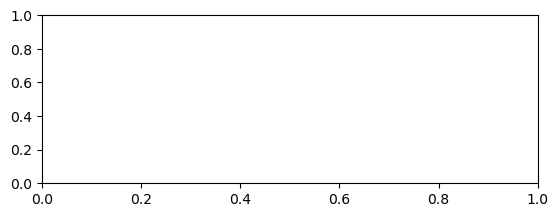

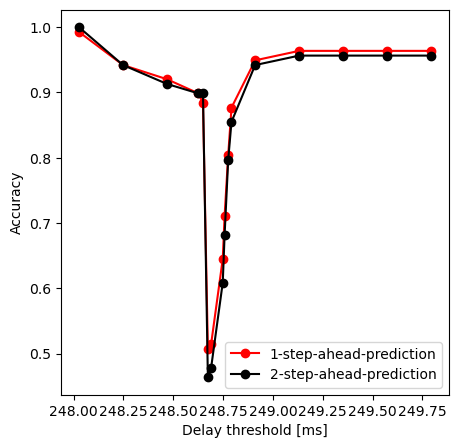

In [216]:
import warnings
warnings.filterwarnings("ignore")
from decimal import Decimal
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from scipy.special import binom, factorial
from sklearn.cluster import KMeans
from scipy.optimize import minimize

from statsmodels.tsa.stattools import adfuller
import pmdarima as pm

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LassoCV
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import mixed_precision
import time
import matplotlib.pyplot as plt
from scipy.special import binom, factorial
from sklearn.cluster import KMeans
from scipy.optimize import minimize
import pandas as pd
import numpy as np
import keras
from keras.layers import LSTM, Dropout, Dense
import tensorflow as tf
#import numpy as np
#import pandas as pd
#import tensorflow as tf
from statsmodels.tsa.stattools import adfuller
import pmdarima as pm
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LassoCV
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from sklearn.model_selection import train_test_split 
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, classification_report

#Set random seed
random.seed(42)
np.random.seed(42)
tf.compat.v1.reset_default_graph()
tf.compat.v2.random.set_seed(42)




def MLParchitecture():
    """
    This function builds an architecture for an LSTM network, and returns the network model
    """
    mlp = keras.Sequential([layers.LSTM(10, activation = 'sigmoid', input_shape=[
    5,7
    ]), layers.Dense(1)])
    optimizer = NonFusedAdam()
    mlp.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse']) 
   # tf.keras.models.experimental.SharpnessAwareMinimization(
  #   mlp, rho=0.05, num_batch_splits=None, name=None)
    return mlp



def LSTMarchitecture():
    """
    This function builds an architecture for an LSTM network, and returns the network model
    """
    lstm = keras.Sequential([layers.LSTM(10, activation = 'sigmoid', input_shape=[
    5,7]), layers.Dense(1)])
    optimizer = NonFusedAdam()
    lstm.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])     
   # tf.keras.models.experimental.SharpnessAwareMinimization(lstm, rho=0.05, num_batch_splits=None, name=None)
    #SharpnessAwareMinimization(lstm)
    return lstm






Result_threshold = []
Result_mlp = []
Result_threshold_lstm = []
Result_threshold_mlp= []
Result_lstm = []
Result_mlp = []
Result_mlp_accuracy=[]
Result_lstm_accuracy=[]
lstm_time=[]
mlp_time=[]
time_mlp=[]
time_lstm=[]
data =pd.read_csv('new_dataset_0_9 (1).csv')





    
    



for t in range(0, 16): #set threshold 1-3 1 nanoseconds 
    C=[248.0269, 248.2478,  248.4688, 248.6263, 248.649,  248.6735,  248.6898, 248.7482,  248.7574,  248.7756, 248.7921, 248.9108, 249.1318, 249.3527, 249.5737, 249.7947, 250.0157, 250.2366 ]
    #C=[248.7574,  248.7756, 248.7921]
    def gen_pack_delay_sequence():
        Delay = data[["ENDTOEND"]]
        Delay_value = Delay.T
        length=len(Delay_value)
        for i in range(data.shape[0]):
            
            if  Delay.values[i] < C[t]:
                Delay.loc[i] = 1
            else:    
                Delay.loc[i] = 0
        return  Delay
    
    def generate(X, y, seq_length = 5, step=2):
        X_local = []
        y_local = []
        for start in range(0, len(data) - seq_length, step):
            end = start + seq_length
            X_local.append(X[start:end])
            y_local.append(y[end-1])
        return np.array(X_local), np.array(y_local)
    
    def generate_mlp(X, y, seq_length = 5, step=1):
        X_local = []
        y_local = []
        for start in range(0, len(data) - seq_length, step):
            end = start + seq_length
            X_local.append(X[start:end])
            y_local.append(y[end-1])
        return np.array(X_local), np.array(y_local)
    
    y_delay = gen_pack_delay_sequence()
    X = data
    
    ytrain_lstm = y_delay.values
    Xtrain_lstm = data.values
    Xtrain_lstm.shape, ytrain_lstm.shape
    

    X_seq, y=generate(X.values, y_delay.values, seq_length = 5, step = 2)
    ytrain_lstm = y
    Xtrain_lstm = X_seq
    Xtrain_lstm .shape, ytrain_lstm .shape
    
    train_size = int(len(Xtrain_lstm) * 0.7)
    X_train_lstm, y_train_lstm  = Xtrain_lstm [:train_size], ytrain_lstm[:train_size]
    X_test_lstm, y_test_lstm  = Xtrain_lstm[train_size:], ytrain_lstm[train_size:]
    
   
    ytrain_mlp = y_delay.values
    Xtrain_mlp = data.values
    Xtrain_mlp.shape, ytrain_mlp.shape
    

    X_seq_mlp, y_mlp=generate_mlp(X.values, y_delay.values, seq_length = 5, step = 1)
    ytrain_mlp = y_mlp
    Xtrain_mlp = X_seq_mlp
    Xtrain_mlp .shape, ytrain_mlp .shape
    
    train_size = int(len(Xtrain_mlp) * 0.7)
    X_train_mlp , y_train_mlp  = Xtrain_mlp [:train_size], ytrain_mlp[:train_size]
    X_test_mlp, y_test_mlp  = Xtrain_mlp[train_size:], ytrain_mlp[train_size:]
    


 # X_train, X_test, y_train, y_test = train_test_split(Xtrain, ytrain, test_size = 0.20)  
# Feature scaling
 #   scaler = StandardScaler()  
 #   scaler.fit(X_train)
 #   X_train = scaler.transform(X_train)  
 #   X_test = scaler.transform(X_test)
    
    
    
    start_time_lstm=time.time()
    lstm=LSTMarchitecture()
    history=lstm.fit(X_train_lstm, y_train_lstm, batch_size=64, epochs=30)
    lstm_time.append(time.time()-start_time_lstm)
    training_loss_lstm=history.history['loss']
    epoch_count_lstm=range(1, len(training_loss_lstm)+1)
    lstm.evaluate(X_test_lstm, y_test_lstm)
    y_test_prob_lstm  = lstm.predict(X_test_lstm)
    y_test_pred_lstm = np.where(y_test_prob_lstm  > 0.5, 1, 0)
    confusion_matrix(y_test_lstm , y_test_pred_lstm )
    Test_accuracy_lstm  = sum((y_test_pred_lstm )==y_test_lstm )/len(y_test_lstm )
    
   # confusion_matrix(y_test,y_test_pred)
    #Test_accuracy = sum(y_test_pred==y_test)/len(y_test)
    Result_lstm.append(training_loss_lstm)
    Result_lstm_accuracy.append(Test_accuracy_lstm)
    Result_threshold_lstm.append(epoch_count_lstm)
    time_lstm.append(C[t])
    print(classification_report(y_test_lstm , y_test_pred_lstm ))
    
    
    
    
    
    start_time_mlp=time.time()
    mlp=MLParchitecture()
    history=mlp.fit(X_train_lstm, y_train_lstm, batch_size=64, epochs=30)
    mlp_time.append(time.time()-start_time_mlp)
    training_loss_mlp=history.history['loss']
    epoch_count_mlp=range(1, len(training_loss_mlp)+1)
    
    mlp.evaluate(X_test_mlp, y_test_mlp)
    y_test_prob = mlp.predict(X_test_mlp)
    y_test_pred= np.where(y_test_prob > 0.5, 1, 0)
    confusion_matrix(y_test_mlp, y_test_pred)
    Test_accuracy_mlp = sum((y_test_pred)==y_test_mlp)/len(y_test_mlp)
    
   # confusion_matrix(y_test,y_test_pred)
    #Test_accuracy = sum(y_test_pred==y_test)/len(y_test)
    Result_mlp.append(training_loss_mlp)
    Result_mlp_accuracy.append(Test_accuracy_mlp)
    Result_threshold_mlp.append(epoch_count_mlp)
    time_mlp.append(C[t])
    #nd(epoch_count_mlp)
    print(classification_report(y_test_mlp, y_test_pred))
    
    
    
    

#plt.subplot(2,1,1)
#plt.plot(tf.transpose(Result_threshold_mlp),tf.transpose( Result_mlp),'r-o')
#plt.xlabel('Epochs')
#plt.ylabel('Training loss')
#plt.show();
#plt.plot(tf.transpose(Result_threshold_lstm), tf.transpose(Result_lstm), 'k-o')
#plt.xlabel('Epochs')
#plt.ylabel('Training loss')
#plt.show();



#plt.subplot(2,1,1)
#plt.plot(time_mlp, mlp_time,'r-o')
#plt.xlabel('Delay threshold [ms]')
#plt.ylabel('Time [s]')
#plt.plot(time_lstm, lstm_time, 'k-o')
#plt.legend(['LSTM with Proposed SGD','LSTM with ADAM' ])
#plt.xlabel('Delay threshold [ms]')
#plt.ylabel('Time [s]')
#plt.show();




results_df_mlp = pd.DataFrame()
results_df_mlp['MLP']=   Result_mlp_accuracy
results_df_mlp.to_csv('Result_mlp_7.csv')

###########
results_df_lstm = pd.DataFrame()
results_df_lstm ['LSTM'] =   Result_lstm_accuracy
results_df_lstm.to_csv('Result_lstm_7.csv')


#####################

plt.subplot(2,1,1)
fig = plt.figure(figsize=(5, 5))
plt.plot(time_mlp, Result_mlp_accuracy,'r-o')
plt.xlabel('Delay threshold [m]')
plt.ylabel('Accuracy')
plt.plot(time_lstm, Result_lstm_accuracy, 'k-o')
plt.legend(['1-step-ahead-prediction','2-step-ahead-prediction' ])
plt.xlabel('Delay threshold [ms]')




In [248]:
import sys
import time
import threading
import random
import numpy as np
#import ray
import tensorflow.compat.v2 as tf

from keras import backend_config
from keras.optimizers.optimizer_v2 import optimizer_v2
from tensorflow.python.util.tf_export import keras_export
from decimal import Decimal
import contextlib
import functools
import warnings
import math
from tensorflow.keras import mixed_precision
import mpmath
from tensorflow.python.distribute import central_storage_strategy
from tensorflow.python.distribute import distribution_strategy_context as distribute_ctx
from tensorflow.python.distribute import parameter_server_strategy
from tensorflow.python.distribute import parameter_server_strategy_v2
from tensorflow.python.distribute import values as ds_values
from tensorflow.python.eager import backprop
from tensorflow.python.eager import context
from tensorflow.python.framework import dtypes
from tensorflow.python.framework import indexed_slices
from tensorflow.python.framework import ops
from tensorflow.python.framework import tensor_util
from tensorflow.python.keras import backend
from tensorflow.python.keras import initializers
from tensorflow.python.keras.engine import base_layer_utils
from tensorflow.python.keras.optimizer_v2 import learning_rate_schedule
from tensorflow.python.keras.optimizer_v2 import utils as optimizer_utils
from tensorflow.python.keras.utils import generic_utils
from tensorflow.python.keras.utils import layer_utils
from tensorflow.python.keras.utils import tf_inspect
from tensorflow.python.keras.utils import tf_utils
from tensorflow.python.ops import array_ops
from tensorflow.python.ops import control_flow_ops
from tensorflow.python.ops import gen_resource_variable_ops
from tensorflow.python.ops import gradients
from tensorflow.python.ops import math_ops
from tensorflow.python.ops import variables as tf_variables
from tensorflow.python.saved_model import revived_types
from tensorflow.python.trackable import base as trackable
from tensorflow.python.util import nest
from tensorflow.python.util.tf_export import keras_export

class NonFusedAdam(optimizer_v2.OptimizerV2):



    _HAS_AGGREGATE_GRAD = True

    def __init__(
        self,
        learning_rate_standard=0.001,
        learning_rate=0.001,
        learning_rate_max=0.1,
        beta_1=0.9,
        beta_2=0.999,
        beta_3=0.1,
        beta_4=0.5,
        epsilon=1e-7,
        amsgrad=False,
        name="Adam",
        **kwargs
    ):
        """Construct a new Adam optimizer called GPADAM which is a minor modification of 
        nonfused ADAM in Tensoflow library.
        
        """

        super().__init__(name, **kwargs)
        #self._set_hyper("learning_rate_max", kwargs.get("lrmax", learning_rate_max))
        self._set_hyper("decay", self._initial_decay)
        self._set_hyper("learning_rate_standard", learning_rate_standard)
        self._set_hyper("learning_rate", learning_rate)
        self._set_hyper("beta_1", beta_1)
        self._set_hyper("beta_2", beta_2)
        self._set_hyper("beta_3", beta_3)
        self._set_hyper("beta_4", beta_4)
        self._set_hyper("learning_rate_max", learning_rate_max)
        self.epsilon = epsilon or backend_config.epsilon()
        self.amsgrad = amsgrad

    def _create_slots(self, var_list):
        # Create slots for the first and second moments.
        # Separate for-loops to respect the ordering of slot variables from v1.
        for var in var_list:
            self.add_slot(var, "m")
        for var in var_list:
            self.add_slot(var, "v")
        if self.amsgrad:
            for var in var_list:
                self.add_slot(var, "vhat")
                           

    def _prepare_local(self, var_device, var_dtype, apply_state):
        super()._prepare_local(var_device, var_dtype, apply_state)

        local_step = tf.cast(self.iterations + 1, var_dtype)
        learning_rate_t = tf.identity(self._get_hyper("learning_rate", var_dtype))
        learning_rate_max_t = tf.identity(self._get_hyper("learning_rate_max", var_dtype))
        learning_rate_standard_t = tf.identity(self._get_hyper("learning_rate_standard", var_dtype))
        beta_1_t = tf.identity(self._get_hyper("beta_1", var_dtype))
        beta_2_t = tf.identity(self._get_hyper("beta_2", var_dtype))
        beta_3_t = tf.identity(self._get_hyper("beta_3", var_dtype))
        beta_4_t = tf.identity(self._get_hyper("beta_4", var_dtype))
        #if isinstance(lrmax_t, learning_rate_schedule.LearningRateSchedule):
         #  local_step = math_ops.cast(self.iterations, var_dtype)
         #  lrmax_t = math_ops.cast(lrmax_t(local_step), var_dtype)
        #if self._initial_decay > 0.:
        #   local_step = math_ops.cast(self.iterations, var_dtype)
        #   decay_t = math_ops.cast(self._initial_decay, var_dtype)
        learning_rate_max_power = tf.pow(learning_rate_max_t, local_step)
        learning_rate_power = tf.pow(learning_rate_t, local_step)
        beta_1_power = tf.pow(beta_1_t, local_step)
        beta_2_power = tf.pow(beta_2_t, local_step)
        beta_3_power = tf.pow(beta_3_t, local_step)
        beta_4_power = tf.pow(beta_4_t, local_step)
        #lr = apply_state[(var_device, var_dtype)]["lr_t"] * (
        #    tf.sqrt(1 - beta_2_power) / (1 - beta_1_power)
       # )
        
        apply_state[(var_device, var_dtype)].update(
            dict(
                learning_rate_standard_t= learning_rate_standard_t,
                learning_rate_t=learning_rate_t,
                learning_rate_power=learning_rate_power,
                learning_rate_max_t=learning_rate_max_t,
                learning_rate_max_power=learning_rate_max_power,
                epsilon=tf.convert_to_tensor(self.epsilon, var_dtype),
                beta_1_t=beta_1_t,
                beta_1_power=beta_1_power,
                one_minus_beta_1_t=1 - beta_1_t,
                beta_2_t=beta_2_t,
                beta_2_power=beta_2_power,
                one_minus_beta_2_t=1 - beta_2_t,
                beta_3_t=beta_3_t,
                beta_3_power=beta_3_power,
                one_minus_beta_3_t=1 - beta_3_t,
                beta_4_t=beta_4_t,
                beta_4_power=beta_4_power,
                one_minus_beta_4_t=1 - beta_4_t,
            )
        )

    def set_weights(self, weights):
        params = self.weights
        # If the weights are generated by Keras V1 optimizer, it includes vhats
        # even without amsgrad, i.e, V1 optimizer has 3x + 1 variables, while V2
        # optimizer has 2x + 1 variables. Filter vhats out for compatibility.
        num_vars = int((len(params) - 1) / 2)
        if len(weights) == 3 * num_vars + 1:
            weights = weights[: len(params)]
        super().set_weights(weights)

    @tf.function(jit_compile=True)
    def _resource_apply_dense(self, grad, var, apply_state=None):
        var_device, var_dtype = var.device, var.dtype.base_dtype
        coefficients = (apply_state or {}).get(
            (var_device, var_dtype)
        ) or self._fallback_apply_state(var_device, var_dtype)

        m = self.get_slot(var, "m")
        v = self.get_slot(var, "v")
       # g_min = ((math_ops.sign((tf.math.reduce_max((v))*.1) - (v)) + 1) /2)
    #a_max = tf.math.abs(tf.math.zero_fraction((math_ops.sign(v - (math_ops.reduce_mean(tf.math.abs(v))/10)) + 1) /2)) 
       # g_max =  ((math_ops.sign(tf.math.abs(v) - tf.math.abs(tf.math.reduce_max((v))/2)) + 1)/2)
        f_min = ((math_ops.sign((tf.math.reduce_mean((v))*1) - (v)) + 1) /2)
        f_max =  ((math_ops.sign((v) - (tf.math.reduce_mean((v))*1)) + 1)/2)
        minimum=float(tf.size(g_min_mean))-float(tf.math.count_nonzero(g_min_mean))
        maximum = float(tf.size(g_max_mean))-float(tf.math.count_nonzero(g_max_mean))
        alpha_standard = (
            coefficients["learning_rate_standard_t"]
            * tf.sqrt(1 - coefficients["beta_2_power"])
            / (1 - coefficients["beta_1_power"])
        )
        
        alpha_min = (
            coefficients["learning_rate_t"]
            * tf.sqrt(1 - coefficients["beta_2_power"])
            / (1 - coefficients["beta_1_power"])
        )
        alpha_max = (
            coefficients["learning_rate_max_t"]
            * tf.sqrt(1 - coefficients["beta_2_power"])
            / (1 - coefficients["beta_1_power"])
        )
        
        m.assign_add((grad - m) * (1 - coefficients["beta_1_t"]))
        v.assign_add((tf.square(grad) - v) * (1 - coefficients["beta_2_t"]))
        if self.amsgrad:
           vhat = self.get_slot(var, "vhat")
           vhat.assign(tf.maximum(vhat, v))
           v = vhat
           g_min_mean = ((math_ops.sign((tf.math.reduce_mean((v))*1) - (v)) + 1) /2)
           g_max_mean =  ((math_ops.sign((v) - (tf.math.reduce_mean((v))*1)) + 1)/2)
          
            
       # float ( tf.math.count_nonzero(g_max)) <(float(tf.math.count_nonzero(g_min_mean))) and
        if     (float ( tf.math.count_nonzero(f_max_mean))) < 2* (float(tf.math.count_nonzero(f_min_mean))):
              #var.assign_sub((m * alpha_max * (g_max_mean))  / (tf.sqrt(v) - coefficients["epsilon"]) + (m * alpha_standard * (g_min_mean) ) / (tf.sqrt(v) - coefficients["epsilon"]))
                var.assign_sub((m * alpha_min)/ (tf.pow(v,1/2) + coefficients["epsilon"])) 
                #var.assign_sub((m * (0.0013* g_max_mean + alpha_standard*g_min_mean ))/ (tf.pow(v,1/2) + coefficients["epsilon"]))
       #        var.assign_sub((m * (alpha_max * g_max_mean*math_ops.sign(v)  + 0.001))/ (tf.pow(v,1/2) - coefficients["epsilon"]))
           #var.assign_sub((m * (alpha_max* g_max_mean + alpha_min*g_min_mean )/ (tf.pow(v,1/2) - coefficients["epsilon"])))
        else:
                #var.assign_sub((m * alpha_max ) / (tf.pow(v,1/8) - coefficients["epsilon"]))
                var.assign_sub((m * (alpha_max))/ (tf.pow(v,1/2) + coefficients["epsilon"]))
                       #+ (m * alpha_min * (g_min_mean) ) / (tf.pow(v,1/8) - coefficients["epsilon"]))
                  #var.assign_sub((m * alpha_max * g_max_mean) / (tf.sqrt(v) - coefficients["epsilon"]) + (m * alpha_min * g_min_mean ) / (tf.sqrt(v) - coefficients["epsilon"]))  
    @tf.function(jit_compile=True)
    def _resource_apply_sparse(self, grad, var, indices, apply_state=None):
        var_device, var_dtype = var.device, var.dtype.base_dtype
        coefficients = (apply_state or {}).get(
            (var_device, var_dtype)
        ) or self._fallback_apply_state(var_device, var_dtype)

        # m_t = beta1 * m + (1 - beta1) * g_t
        m = self.get_slot(var, "m")
        m_scaled_g_values = grad * coefficients["one_minus_beta_1_t"]
        m.assign(m * coefficients["beta_1_t"])
        m.scatter_add(tf.IndexedSlices(m_scaled_g_values, indices))

        # v_t = beta2 * v + (1 - beta2) * (g_t * g_t)
        v = self.get_slot(var, "v")
        v_scaled_g_values = (grad * grad) * coefficients["one_minus_beta_2_t"]
        v.assign(v * coefficients["beta_2_t"])
        v.scatter_add(tf.IndexedSlices(v_scaled_g_values, indices))
        g_min = ((math_ops.sign((tf.math.reduce_mean((v))/1) - (v)) + 1) /2)
    #a_max = tf.math.abs(tf.math.zero_fraction((math_ops.sign(v - (math_ops.reduce_mean(tf.math.abs(v))/10)) + 1) /2)) 
        g_max =  ((math_ops.sign((v) - (tf.math.reduce_mean((v))/1)) + 1)/2)
        if not self.amsgrad:
            var.assign_sub(
            #   ( g_max * coefficients["learning_rate_max"] * m / (tf.sqrt(v) + coefficients["epsilon"])) + (g_min * coefficients["learning_rate"] * m / (tf.sqrt(v) + coefficients["epsilon"]))
                (m * coefficients["learning_rate"] ) / (tf.sqrt(v) - coefficients["epsilon"])
            )
        else:
            v_hat = self.get_slot(var, "vhat")
            v_hat.assign(tf.maximum(v_hat, v))
            var.assign_sub(
               # (g_max * coefficients["learning_rate_max"] * m / (tf.sqrt(v_hat) + coefficients["epsilon"])) +  (g_min *coefficients["learning_rate"] * m / (tf.sqrt(v_hat) + coefficients["epsilon"])) 
                (m * coefficients["learning_rate"] ) / (tf.sqrt(v) - coefficients["epsilon"])
            )

    def get_config(self):
        config = super().get_config()
        config.update(
            {
                #"learning_rate": self._serialize_hyperparameter(
                #    "learning_rate"
               # ),
                "decay": self._initial_decay,
                "learning_rate":self._serialize_hyperparameter("learning_rate"),
                "learning_rate_max": self._serialize_hyperparameter("learning_rate_max"),
                "beta_1": self._serialize_hyperparameter("beta_1"),
                "beta_2": self._serialize_hyperparameter("beta_2"),
                "epsilon": self.epsilon,
                "amsgrad": self.amsgrad,
            }
        )
        return config

Epoch 1/15
5/5 [==============================] - 2s 4ms/step - loss: 0.2782 - mae: 0.3972 - mse: 0.2782
Epoch 2/15
5/5 [==============================] - 0s 5ms/step - loss: 0.1826 - mae: 0.4214 - mse: 0.1826
Epoch 3/15
5/5 [==============================] - 0s 4ms/step - loss: 0.0718 - mae: 0.1797 - mse: 0.0718
Epoch 4/15
5/5 [==============================] - 0s 5ms/step - loss: 0.0927 - mae: 0.2019 - mse: 0.0927
Epoch 5/15
5/5 [==============================] - 0s 4ms/step - loss: 0.0527 - mae: 0.1209 - mse: 0.0527
Epoch 6/15
5/5 [==============================] - 0s 4ms/step - loss: 0.0627 - mae: 0.2040 - mse: 0.0627
Epoch 7/15
5/5 [==============================] - 0s 4ms/step - loss: 0.0542 - mae: 0.1005 - mse: 0.0542
Epoch 8/15
5/5 [==============================] - 0s 4ms/step - loss: 0.0530 - mae: 0.0824 - mse: 0.0530
Epoch 9/15
5/5 [==============================] - 0s 4ms/step - loss: 0.0512 - mae: 0.1354 - mse: 0.0512
Epoch 10/15
5/5 [==============================] - 0s 4

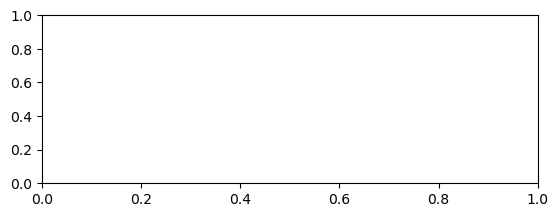

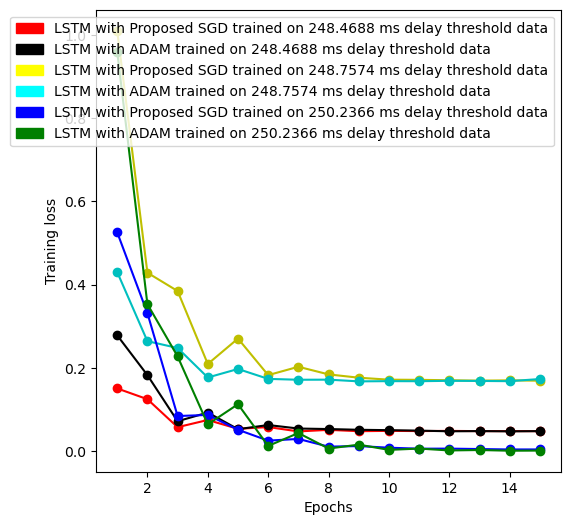

In [249]:
import warnings
warnings.filterwarnings("ignore")
from decimal import Decimal
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from scipy.special import binom, factorial
from sklearn.cluster import KMeans
from scipy.optimize import minimize

from statsmodels.tsa.stattools import adfuller
import pmdarima as pm

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LassoCV
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import mixed_precision
import time
import matplotlib.pyplot as plt
from scipy.special import binom, factorial
from sklearn.cluster import KMeans
from scipy.optimize import minimize
import pandas as pd
import numpy as np
import keras
from keras.layers import LSTM, Dropout, Dense
import tensorflow as tf
#import numpy as np
#import pandas as pd
#import tensorflow as tf
from statsmodels.tsa.stattools import adfuller
import pmdarima as pm
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LassoCV
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from sklearn.model_selection import train_test_split 
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, classification_report

#Set random seed
random.seed(42)
np.random.seed(42)
tf.compat.v1.reset_default_graph()
tf.compat.v2.random.set_seed(42)





def MLParchitecture():
    """
    This function builds an architecture for an LSTM network, and returns the network model
    """
    mlp = keras.Sequential([layers.LSTM(10, activation = 'sigmoid', input_shape=[
    5,7
    ]), layers.Dense(1)])
    optimizer = NonFusedAdam()
    mlp.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse']) 
   # tf.keras.models.experimental.SharpnessAwareMinimization(
  #   mlp, rho=0.05, num_batch_splits=None, name=None)
    return mlp



def LSTMarchitecture():
    """
    This function builds an architecture for an LSTM network, and returns the network model
    """
    lstm = keras.Sequential([layers.LSTM(10, activation = 'sigmoid', input_shape=[
    5,7]), layers.Dense(1)])
    optimizer = keras.optimizers.Adam(lr=0.01)
    lstm.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])     
   # tf.keras.models.experimental.SharpnessAwareMinimization(lstm, rho=0.05, num_batch_splits=None, name=None)
    #SharpnessAwareMinimization(lstm)
    return lstm






Result_threshold = []
Result_mlp = []
Result_threshold_lstm = []
Result_threshold_mlp= []
Result_lstm = []
Result_mlp = []
Result_mlp_accuracy=[]
Result_lstm_accuracy=[]
lstm_time=[]
mlp_time=[]
time_mlp=[]
time_lstm=[]
data =pd.read_csv('new_dataset_0_9 (1).csv')





    
    



for t in range(0, 3): #set threshold 1-3 1 nanoseconds 
    #C=[248.0269, 248.2478,  248.4688, 248.6263, 248.649,  248.6735,  248.6898, 248.7482,  248.7574,  248.7756, 248.7921, 248.9108, 249.1318, 249.3527, 249.5737, 249.7947, 250.0157, 250.2366 ]
    C=[ 248.4688,   248.7574,   250.2366 ]
    def gen_pack_delay_sequence():
        Delay = data[["ENDTOEND"]]
        Delay_value = Delay.T
        length=len(Delay_value)
        for i in range(data.shape[0]):
            
            if  Delay.values[i] < C[t]:
                Delay.loc[i] = 1
            else:    
                Delay.loc[i] = 0
        return  Delay
    
    def generate(X, y, seq_length = 5, step=1):
        X_local = []
        y_local = []
        for start in range(0, len(data) - seq_length, step):
            end = start + seq_length
            X_local.append(X[start:end])
            y_local.append(y[end-1])
        return np.array(X_local), np.array(y_local)
    
    def generate_mlp(X, y, seq_length = 5, step=1):
        X_local = []
        y_local = []
        for start in range(0, len(data) - seq_length, step):
            end = start + seq_length
            X_local.append(X[start:end])
            y_local.append(y[end-1])
        return np.array(X_local), np.array(y_local)
    
    y_delay = gen_pack_delay_sequence()
    X = data
    
    ytrain_lstm = y_delay.values
    Xtrain_lstm = data.values
    Xtrain_lstm.shape, ytrain_lstm.shape
    

    X_seq, y=generate(X.values, y_delay.values, seq_length = 5, step = 1)
    ytrain_lstm = y
    Xtrain_lstm = X_seq
    Xtrain_lstm .shape, ytrain_lstm .shape
    
    train_size = int(len(Xtrain_lstm) * 0.7)
    X_train_lstm, y_train_lstm  = Xtrain_lstm [:train_size], ytrain_lstm[:train_size]
    X_test_lstm, y_test_lstm  = Xtrain_lstm[train_size:], ytrain_lstm[train_size:]
    
   
    ytrain_mlp = y_delay.values
    Xtrain_mlp = data.values
    Xtrain_mlp.shape, ytrain_mlp.shape
    

    X_seq_mlp, y_mlp=generate_mlp(X.values, y_delay.values, seq_length = 5, step = 1)
    ytrain_mlp = y_mlp
    Xtrain_mlp = X_seq_mlp
    Xtrain_mlp .shape, ytrain_mlp .shape
    
    train_size = int(len(Xtrain_mlp) * 0.7)
    X_train_mlp , y_train_mlp  = Xtrain_mlp [:train_size], ytrain_mlp[:train_size]
    X_test_mlp, y_test_mlp  = Xtrain_mlp[train_size:], ytrain_mlp[train_size:]
    


 # X_train, X_test, y_train, y_test = train_test_split(Xtrain, ytrain, test_size = 0.20)  
# Feature scaling
 #   scaler = StandardScaler()  
 #   scaler.fit(X_train)
 #   X_train = scaler.transform(X_train)  
 #   X_test = scaler.transform(X_test)
    
    
    
    start_time_lstm=time.time()
    lstm=LSTMarchitecture()
    history=lstm.fit(X_train_lstm, y_train_lstm, batch_size=64, epochs=15)
    lstm_time.append(time.time()-start_time_lstm)
    training_loss_lstm=history.history['loss']
    epoch_count_lstm=range(1, len(training_loss_lstm)+1)
    lstm.evaluate(X_test_lstm, y_test_lstm)
    y_test_prob_lstm  = lstm.predict(X_test_lstm)
    y_test_pred_lstm = np.where(y_test_prob_lstm  > 0.5, 1, 0)
    confusion_matrix(y_test_lstm , y_test_pred_lstm )
    Test_accuracy_lstm  = sum((y_test_pred_lstm )==y_test_lstm )/len(y_test_lstm )
    
   # confusion_matrix(y_test,y_test_pred)
    #Test_accuracy = sum(y_test_pred==y_test)/len(y_test)
    Result_lstm.append(training_loss_lstm)
    Result_lstm_accuracy.append(Test_accuracy_lstm)
    Result_threshold_lstm.append(epoch_count_lstm)
    time_lstm.append(C[t])
    print(classification_report(y_test_lstm , y_test_pred_lstm ))
    
    
    
    
    
    start_time_mlp=time.time()
    mlp=MLParchitecture()
    history=mlp.fit(X_train_lstm, y_train_lstm, batch_size=64, epochs=15)
    mlp_time.append(time.time()-start_time_mlp)
    training_loss_mlp=history.history['loss']
    epoch_count_mlp=range(1, len(training_loss_mlp)+1)
    
    mlp.evaluate(X_test_mlp, y_test_mlp)
    y_test_prob = mlp.predict(X_test_mlp)
    y_test_pred= np.where(y_test_prob > 0.5, 1, 0)
    confusion_matrix(y_test_mlp, y_test_pred)
    Test_accuracy_mlp = sum((y_test_pred)==y_test_mlp)/len(y_test_mlp)
    
   # confusion_matrix(y_test,y_test_pred)
    #Test_accuracy = sum(y_test_pred==y_test)/len(y_test)
    Result_mlp.append(training_loss_mlp)
    Result_mlp_accuracy.append(Test_accuracy_mlp)
    Result_threshold_mlp.append(epoch_count_mlp)
    time_mlp.append(C[t])
    #nd(epoch_count_mlp)
    print(classification_report(y_test_mlp, y_test_pred))
    
    

results_df_mlp = pd.DataFrame()
results_df_mlp['MLP']=   Result_mlp
results_df_mlp.to_csv('Result_mlp_8_onestep.csv')

###########
results_df_lstm = pd.DataFrame()
results_df_lstm ['LSTM'] =   Result_lstm
results_df_lstm.to_csv('Result_lstm_8_onestep.csv')    
    


plt.subplot(2,1,1)
fig = plt.figure(figsize=(6, 6))
plt.plot(tf.transpose(Result_threshold_mlp[0:1]),tf.transpose( Result_mlp[0:1]),'r-o')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
#plt.show();
plt.plot(tf.transpose(Result_threshold_lstm[0:1]),tf.transpose( Result_lstm[0:1]), 'k-o')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
red_patch=mpatches.Patch(color='red', label='LSTM with Proposed SGD trained on 248.4688 ms delay threshold data')
black_patch=mpatches.Patch(color='black', label='LSTM with ADAM trained on 248.4688 ms delay threshold data')
plt.legend(handles=[red_patch, blue_patch])
#plt.show();
plt.plot(tf.transpose(Result_threshold_mlp[1:2]), tf.transpose( Result_mlp[1:2]),'y-o')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
#plt.show();
plt.plot(tf.transpose(Result_threshold_lstm[1:2]), tf.transpose(Result_lstm[1:2]), 'c-o')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
yellow_patch=mpatches.Patch(color='yellow', label='LSTM with Proposed SGD trained on 248.7574 ms delay threshold data')
cyan_patch=mpatches.Patch(color='cyan', label='LSTM with ADAM trained on 248.7574 ms delay threshold data')
plt.legend(handles=[red_patch, blue_patch])



plt.plot(tf.transpose(Result_threshold_mlp[2:3]), tf.transpose(Result_mlp[2:3]),'b-o')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
#plt.show();
plt.plot(tf.transpose(Result_threshold_lstm[2:3]), tf.transpose(Result_lstm[2:3]), 'g-o')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
blue_patch=mpatches.Patch(color='blue', label='LSTM with Proposed SGD trained on 250.2366 ms delay threshold data')
green_patch=mpatches.Patch(color='green', label='LSTM with ADAM trained on 250.2366 ms delay threshold data')
plt.legend(handles=[red_patch, black_patch, yellow_patch, cyan_patch, blue_patch, green_patch])





















#plt.show();



#plt.subplot(2,1,1)
#plt.plot(time_mlp, mlp_time,'r-o')
#plt.xlabel('Delay threshold [ms]')
#plt.ylabel('Time [s]')
#plt.plot(time_lstm, lstm_time, 'k-o')
#plt.legend(['LSTM with Proposed SGD','LSTM with ADAM' ])
#plt.xlabel('Delay threshold [ms]')
#plt.ylabel('Time [s]')
#plt.show();


#plt.subplot(2,1,1)
#plt.plot(time_mlp, Result_mlp_accuracy,'r-o')
#plt.xlabel('Delay threshold [m]')
#plt.ylabel('Training time [s]')
#plt.plot(time_lstm, Result_lstm_accuracy, 'k-o')
#plt.legend(['1-step-ahead-prediction','2-step-ahead-prediction' ])
#plt.xlabel('Delay threshold [ms]')
##plt.ylabel('Accuracy')
#plt.show();

Epoch 1/15
3/3 [==============================] - 2s 5ms/step - loss: 0.4578 - mae: 0.5846 - mse: 0.4578
Epoch 2/15
3/3 [==============================] - 0s 4ms/step - loss: 0.0730 - mae: 0.2184 - mse: 0.0730
Epoch 3/15
3/3 [==============================] - 0s 5ms/step - loss: 0.2058 - mae: 0.4508 - mse: 0.2058
Epoch 4/15
3/3 [==============================] - 0s 5ms/step - loss: 0.1071 - mae: 0.3068 - mse: 0.1071
Epoch 5/15
3/3 [==============================] - 0s 5ms/step - loss: 0.0547 - mae: 0.1178 - mse: 0.0547
Epoch 6/15
3/3 [==============================] - 0s 5ms/step - loss: 0.0997 - mae: 0.2301 - mse: 0.0997
Epoch 7/15
3/3 [==============================] - 0s 4ms/step - loss: 0.0769 - mae: 0.1830 - mse: 0.0769
Epoch 8/15
3/3 [==============================] - 0s 6ms/step - loss: 0.0448 - mae: 0.0895 - mse: 0.0448
Epoch 9/15
3/3 [==============================] - 0s 5ms/step - loss: 0.0589 - mae: 0.2038 - mse: 0.0589
Epoch 10/15
3/3 [==============================] - 0s 5

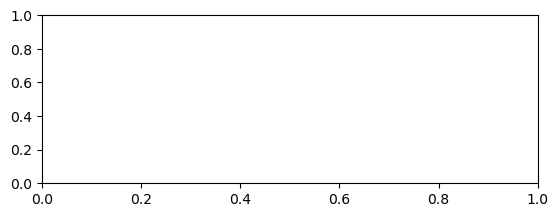

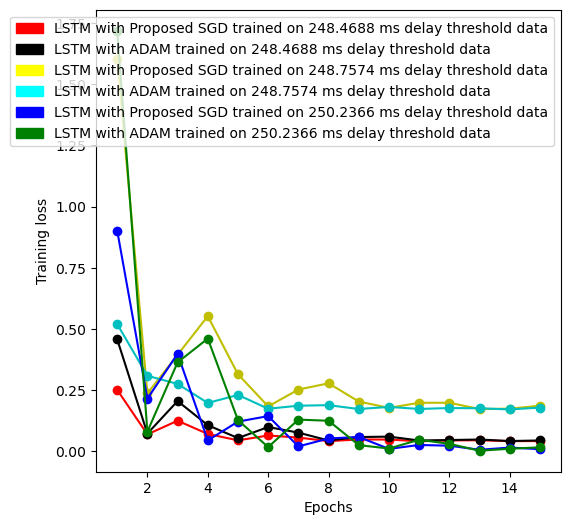

In [250]:
import warnings
warnings.filterwarnings("ignore")
from decimal import Decimal
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from scipy.special import binom, factorial
from sklearn.cluster import KMeans
from scipy.optimize import minimize

from statsmodels.tsa.stattools import adfuller
import pmdarima as pm

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LassoCV
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import mixed_precision
import time
import matplotlib.pyplot as plt
from scipy.special import binom, factorial
from sklearn.cluster import KMeans
from scipy.optimize import minimize
import pandas as pd
import numpy as np
import keras
from keras.layers import LSTM, Dropout, Dense
import tensorflow as tf
#import numpy as np
#import pandas as pd
#import tensorflow as tf
from statsmodels.tsa.stattools import adfuller
import pmdarima as pm
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LassoCV
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from sklearn.model_selection import train_test_split 
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, classification_report

#Set random seed
random.seed(42)
np.random.seed(42)
tf.compat.v1.reset_default_graph()
tf.compat.v2.random.set_seed(42)






def MLParchitecture():
    """
    This function builds an architecture for an LSTM network, and returns the network model
    """
    mlp = keras.Sequential([layers.LSTM(10, activation = 'sigmoid', input_shape=[
    5,7
    ]), layers.Dense(1)])
    optimizer = NonFusedAdam()
    mlp.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse']) 
   # tf.keras.models.experimental.SharpnessAwareMinimization(
  #   mlp, rho=0.05, num_batch_splits=None, name=None)
    return mlp



def LSTMarchitecture():
    """
    This function builds an architecture for an LSTM network, and returns the network model
    """
    lstm = keras.Sequential([layers.LSTM(10, activation = 'sigmoid', input_shape=[
    5,7]), layers.Dense(1)])
    optimizer = keras.optimizers.Adam(lr=0.01)
    lstm.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])     
   # tf.keras.models.experimental.SharpnessAwareMinimization(lstm, rho=0.05, num_batch_splits=None, name=None)
    #SharpnessAwareMinimization(lstm)
    return lstm






Result_threshold = []
Result_mlp = []
Result_threshold_lstm = []
Result_threshold_mlp= []
Result_lstm = []
Result_mlp = []
Result_mlp_accuracy=[]
Result_lstm_accuracy=[]
lstm_time=[]
mlp_time=[]
time_mlp=[]
time_lstm=[]
data =pd.read_csv('new_dataset_0_9 (1).csv')





    
    



for t in range(0, 3): #set threshold 1-3 1 nanoseconds 
    #C=[248.0269, 248.2478,  248.4688, 248.6263, 248.649,  248.6735,  248.6898, 248.7482,  248.7574,  248.7756, 248.7921, 248.9108, 249.1318, 249.3527, 249.5737, 249.7947, 250.0157, 250.2366 ]
    C=[ 248.4688,   248.7574,   250.2366 ]
    def gen_pack_delay_sequence():
        Delay = data[["ENDTOEND"]]
        Delay_value = Delay.T
        length=len(Delay_value)
        for i in range(data.shape[0]):
            
            if  Delay.values[i] < C[t]:
                Delay.loc[i] = 1
            else:    
                Delay.loc[i] = 0
        return  Delay
    
    def generate(X, y, seq_length = 5, step=2):
        X_local = []
        y_local = []
        for start in range(0, len(data) - seq_length, step):
            end = start + seq_length
            X_local.append(X[start:end])
            y_local.append(y[end-1])
        return np.array(X_local), np.array(y_local)
    
    def generate_mlp(X, y, seq_length = 5, step=2):
        X_local = []
        y_local = []
        for start in range(0, len(data) - seq_length, step):
            end = start + seq_length
            X_local.append(X[start:end])
            y_local.append(y[end-1])
        return np.array(X_local), np.array(y_local)
    
    y_delay = gen_pack_delay_sequence()
    X = data
    
    ytrain_lstm = y_delay.values
    Xtrain_lstm = data.values
    Xtrain_lstm.shape, ytrain_lstm.shape
    

    X_seq, y=generate(X.values, y_delay.values, seq_length = 5, step = 2)
    ytrain_lstm = y
    Xtrain_lstm = X_seq
    Xtrain_lstm .shape, ytrain_lstm .shape
    
    train_size = int(len(Xtrain_lstm) * 0.7)
    X_train_lstm, y_train_lstm  = Xtrain_lstm [:train_size], ytrain_lstm[:train_size]
    X_test_lstm, y_test_lstm  = Xtrain_lstm[train_size:], ytrain_lstm[train_size:]
    
   
    ytrain_mlp = y_delay.values
    Xtrain_mlp = data.values
    Xtrain_mlp.shape, ytrain_mlp.shape
    

    X_seq_mlp, y_mlp=generate_mlp(X.values, y_delay.values, seq_length = 5, step = 2)
    ytrain_mlp = y_mlp
    Xtrain_mlp = X_seq_mlp
    Xtrain_mlp .shape, ytrain_mlp .shape
    
    train_size = int(len(Xtrain_mlp) * 0.7)
    X_train_mlp , y_train_mlp  = Xtrain_mlp [:train_size], ytrain_mlp[:train_size]
    X_test_mlp, y_test_mlp  = Xtrain_mlp[train_size:], ytrain_mlp[train_size:]
    


 # X_train, X_test, y_train, y_test = train_test_split(Xtrain, ytrain, test_size = 0.20)  
# Feature scaling
 #   scaler = StandardScaler()  
 #   scaler.fit(X_train)
 #   X_train = scaler.transform(X_train)  
 #   X_test = scaler.transform(X_test)
    
    
    
    start_time_lstm=time.time()
    lstm=LSTMarchitecture()
    history=lstm.fit(X_train_lstm, y_train_lstm, batch_size=64, epochs=15)
    lstm_time.append(time.time()-start_time_lstm)
    training_loss_lstm=history.history['loss']
    epoch_count_lstm=range(1, len(training_loss_lstm)+1)
    lstm.evaluate(X_test_lstm, y_test_lstm)
    y_test_prob_lstm  = lstm.predict(X_test_lstm)
    y_test_pred_lstm = np.where(y_test_prob_lstm  > 0.5, 1, 0)
    confusion_matrix(y_test_lstm , y_test_pred_lstm )
    Test_accuracy_lstm  = sum((y_test_pred_lstm )==y_test_lstm )/len(y_test_lstm )
    
   # confusion_matrix(y_test,y_test_pred)
    #Test_accuracy = sum(y_test_pred==y_test)/len(y_test)
    Result_lstm.append(training_loss_lstm)
    Result_lstm_accuracy.append(Test_accuracy_lstm)
    Result_threshold_lstm.append(epoch_count_lstm)
    time_lstm.append(C[t])
    print(classification_report(y_test_lstm , y_test_pred_lstm ))
    
    
    
    
    
    start_time_mlp=time.time()
    mlp=MLParchitecture()
    history=mlp.fit(X_train_lstm, y_train_lstm, batch_size=64, epochs=15)
    mlp_time.append(time.time()-start_time_mlp)
    training_loss_mlp=history.history['loss']
    epoch_count_mlp=range(1, len(training_loss_mlp)+1)
    
    mlp.evaluate(X_test_mlp, y_test_mlp)
    y_test_prob = mlp.predict(X_test_mlp)
    y_test_pred= np.where(y_test_prob > 0.5, 1, 0)
    confusion_matrix(y_test_mlp, y_test_pred)
    Test_accuracy_mlp = sum((y_test_pred)==y_test_mlp)/len(y_test_mlp)
    
   # confusion_matrix(y_test,y_test_pred)
    #Test_accuracy = sum(y_test_pred==y_test)/len(y_test)
    Result_mlp.append(training_loss_mlp)
    Result_mlp_accuracy.append(Test_accuracy_mlp)
    Result_threshold_mlp.append(epoch_count_mlp)
    time_mlp.append(C[t])
    #nd(epoch_count_mlp)
    print(classification_report(y_test_mlp, y_test_pred))
    
    

results_df_mlp = pd.DataFrame()
results_df_mlp['MLP']=   Result_mlp
results_df_mlp.to_csv('Result_mlp_8_twostep.csv')

###########
results_df_lstm = pd.DataFrame()
results_df_lstm ['LSTM'] =   Result_lstm
results_df_lstm.to_csv('Result_lstm_8_twostep.csv')     
    

plt.subplot(2,1,1)
fig = plt.figure(figsize=(6, 6))
plt.plot(tf.transpose(Result_threshold_mlp[0:1]),tf.transpose( Result_mlp[0:1]),'r-o')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
#plt.show();
plt.plot(tf.transpose(Result_threshold_lstm[0:1]),tf.transpose( Result_lstm[0:1]), 'k-o')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
red_patch=mpatches.Patch(color='red', label='LSTM with Proposed SGD trained on 248.4688 ms delay threshold data')
black_patch=mpatches.Patch(color='black', label='LSTM with ADAM trained on 248.4688 ms delay threshold data')
plt.legend(handles=[red_patch, blue_patch])
#plt.show();
plt.plot(tf.transpose(Result_threshold_mlp[1:2]), tf.transpose( Result_mlp[1:2]),'y-o')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
#plt.show();
plt.plot(tf.transpose(Result_threshold_lstm[1:2]), tf.transpose(Result_lstm[1:2]), 'c-o')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
yellow_patch=mpatches.Patch(color='yellow', label='LSTM with Proposed SGD trained on 248.7574 ms delay threshold data')
cyan_patch=mpatches.Patch(color='cyan', label='LSTM with ADAM trained on 248.7574 ms delay threshold data')
plt.legend(handles=[red_patch, blue_patch])



plt.plot(tf.transpose(Result_threshold_mlp[2:3]), tf.transpose(Result_mlp[2:3]),'b-o')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
#plt.show();
plt.plot(tf.transpose(Result_threshold_lstm[2:3]), tf.transpose(Result_lstm[2:3]), 'g-o')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
blue_patch=mpatches.Patch(color='blue', label='LSTM with Proposed SGD trained on 250.2366 ms delay threshold data')
green_patch=mpatches.Patch(color='green', label='LSTM with ADAM trained on 250.2366 ms delay threshold data')
plt.legend(handles=[red_patch, black_patch, yellow_patch, cyan_patch, blue_patch, green_patch])



#plt.subplot(2,1,1)
#plt.plot(time_mlp, mlp_time,'r-o')
#plt.xlabel('Delay threshold [ms]')
#plt.ylabel('Time [s]')
#plt.plot(time_lstm, lstm_time, 'k-o')
#plt.legend(['LSTM with Proposed SGD','LSTM with ADAM' ])
#plt.xlabel('Delay threshold [ms]')
#plt.ylabel('Time [s]')
#plt.show();


#plt.subplot(2,1,1)
#plt.plot(time_mlp, Result_mlp_accuracy,'r-o')
#plt.xlabel('Delay threshold [m]')
#plt.ylabel('Training time [s]')
#plt.plot(time_lstm, Result_lstm_accuracy, 'k-o')
#plt.legend(['1-step-ahead-prediction','2-step-ahead-prediction' ])
#plt.xlabel('Delay threshold [ms]')
##plt.ylabel('Accuracy')
#plt.show();

Epoch 1/15
5/5 [==============================] - 2s 5ms/step - loss: 0.2782 - mae: 0.3972 - mse: 0.2782
Epoch 2/15
5/5 [==============================] - 0s 5ms/step - loss: 0.1826 - mae: 0.4214 - mse: 0.1826
Epoch 3/15
5/5 [==============================] - 0s 5ms/step - loss: 0.0718 - mae: 0.1797 - mse: 0.0718
Epoch 4/15
5/5 [==============================] - 0s 5ms/step - loss: 0.0927 - mae: 0.2019 - mse: 0.0927
Epoch 5/15
5/5 [==============================] - 0s 4ms/step - loss: 0.0527 - mae: 0.1209 - mse: 0.0527
Epoch 6/15
5/5 [==============================] - 0s 4ms/step - loss: 0.0627 - mae: 0.2040 - mse: 0.0627
Epoch 7/15
5/5 [==============================] - 0s 4ms/step - loss: 0.0542 - mae: 0.1005 - mse: 0.0542
Epoch 8/15
5/5 [==============================] - 0s 4ms/step - loss: 0.0530 - mae: 0.0824 - mse: 0.0530
Epoch 9/15
5/5 [==============================] - 0s 4ms/step - loss: 0.0512 - mae: 0.1354 - mse: 0.0512
Epoch 10/15
5/5 [==============================] - 0s 4

Text(0, 0.5, 'Time [s]')

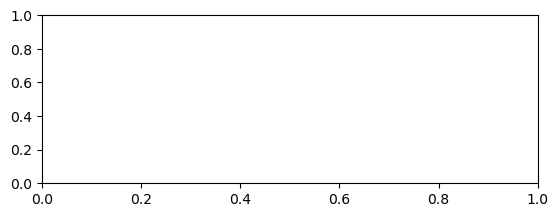

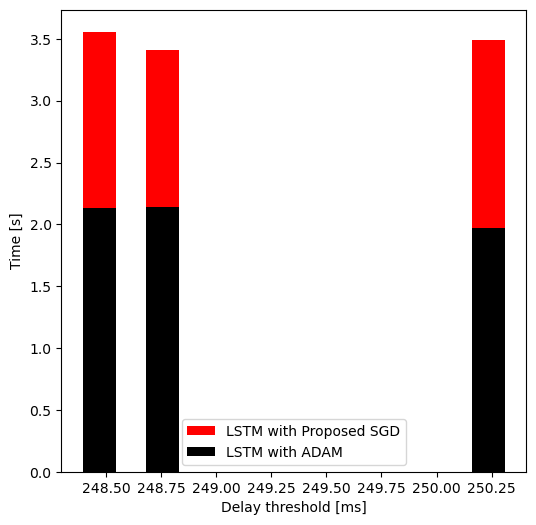

In [219]:
import warnings
warnings.filterwarnings("ignore")
from decimal import Decimal
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from scipy.special import binom, factorial
from sklearn.cluster import KMeans
from scipy.optimize import minimize

from statsmodels.tsa.stattools import adfuller
import pmdarima as pm

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LassoCV
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import mixed_precision
import time
import matplotlib.pyplot as plt
from scipy.special import binom, factorial
from sklearn.cluster import KMeans
from scipy.optimize import minimize
import pandas as pd
import numpy as np
import keras
from keras.layers import LSTM, Dropout, Dense
import tensorflow as tf
#import numpy as np
#import pandas as pd
#import tensorflow as tf
from statsmodels.tsa.stattools import adfuller
import pmdarima as pm
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LassoCV
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from sklearn.model_selection import train_test_split 
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, classification_report

#Set random seed
random.seed(42)
np.random.seed(42)
tf.compat.v1.reset_default_graph()
tf.compat.v2.random.set_seed(42)






def MLParchitecture():
    """
    This function builds an architecture for an LSTM network, and returns the network model
    """
    mlp = keras.Sequential([layers.LSTM(10, activation = 'sigmoid', input_shape=[
    5,7
    ]), layers.Dense(1)])
    optimizer = NonFusedAdam()
    mlp.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse']) 
   # tf.keras.models.experimental.SharpnessAwareMinimization(
  #   mlp, rho=0.05, num_batch_splits=None, name=None)
    return mlp



def LSTMarchitecture():
    """
    This function builds an architecture for an LSTM network, and returns the network model
    """
    lstm = keras.Sequential([layers.LSTM(10, activation = 'sigmoid', input_shape=[
    5,7]), layers.Dense(1)])
    optimizer = keras.optimizers.Adam(lr=0.01)
    lstm.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])     
   # tf.keras.models.experimental.SharpnessAwareMinimization(lstm, rho=0.05, num_batch_splits=None, name=None)
    #SharpnessAwareMinimization(lstm)
    return lstm






Result_threshold = []
Result_mlp = []
Result_threshold_lstm = []
Result_threshold_mlp= []
Result_lstm = []
Result_mlp = []
Result_mlp_accuracy=[]
Result_lstm_accuracy=[]
lstm_time=[]
mlp_time=[]
time_mlp=[]
time_lstm=[]
data =pd.read_csv('new_dataset_0_9 (1).csv')





    
    



for t in range(0, 3): #set threshold 1-3 1 nanoseconds 
    #C=[248.0269, 248.2478,  248.4688, 248.6263, 248.649,  248.6735,  248.6898, 248.7482,  248.7574,  248.7756, 248.7921, 248.9108, 249.1318, 249.3527, 249.5737, 249.7947, 250.0157, 250.2366 ]
    C=[ 248.4688,   248.7574,   250.2366 ]
    def gen_pack_delay_sequence():
        Delay = data[["ENDTOEND"]]
        Delay_value = Delay.T
        length=len(Delay_value)
        for i in range(data.shape[0]):
            
            if  Delay.values[i] < C[t]:
                Delay.loc[i] = 1
            else:    
                Delay.loc[i] = 0
        return  Delay
    
    def generate(X, y, seq_length = 5, step=1):
        X_local = []
        y_local = []
        for start in range(0, len(data) - seq_length, step):
            end = start + seq_length
            X_local.append(X[start:end])
            y_local.append(y[end-1])
        return np.array(X_local), np.array(y_local)
    
    def generate_mlp(X, y, seq_length = 5, step=1):
        X_local = []
        y_local = []
        for start in range(0, len(data) - seq_length, step):
            end = start + seq_length
            X_local.append(X[start:end])
            y_local.append(y[end-1])
        return np.array(X_local), np.array(y_local)
    
    y_delay = gen_pack_delay_sequence()
    X = data
    
    ytrain_lstm = y_delay.values
    Xtrain_lstm = data.values
    Xtrain_lstm.shape, ytrain_lstm.shape
    

    X_seq, y=generate(X.values, y_delay.values, seq_length = 5, step = 1)
    ytrain_lstm = y
    Xtrain_lstm = X_seq
    Xtrain_lstm .shape, ytrain_lstm .shape
    
    train_size = int(len(Xtrain_lstm) * 0.7)
    X_train_lstm, y_train_lstm  = Xtrain_lstm [:train_size], ytrain_lstm[:train_size]
    X_test_lstm, y_test_lstm  = Xtrain_lstm[train_size:], ytrain_lstm[train_size:]
    
   
    ytrain_mlp = y_delay.values
    Xtrain_mlp = data.values
    Xtrain_mlp.shape, ytrain_mlp.shape
    

    X_seq_mlp, y_mlp=generate_mlp(X.values, y_delay.values, seq_length = 5, step = 1)
    ytrain_mlp = y_mlp
    Xtrain_mlp = X_seq_mlp
    Xtrain_mlp .shape, ytrain_mlp .shape
    
    train_size = int(len(Xtrain_mlp) * 0.7)
    X_train_mlp , y_train_mlp  = Xtrain_mlp [:train_size], ytrain_mlp[:train_size]
    X_test_mlp, y_test_mlp  = Xtrain_mlp[train_size:], ytrain_mlp[train_size:]
    


 # X_train, X_test, y_train, y_test = train_test_split(Xtrain, ytrain, test_size = 0.20)  
# Feature scaling
 #   scaler = StandardScaler()  
 #   scaler.fit(X_train)
 #   X_train = scaler.transform(X_train)  
 #   X_test = scaler.transform(X_test)
    
    
    
    start_time_lstm=time.time()
    lstm=LSTMarchitecture()
    history=lstm.fit(X_train_lstm, y_train_lstm, batch_size=64, epochs=15)
    lstm_time.append(time.time()-start_time_lstm)
    training_loss_lstm=history.history['loss']
    epoch_count_lstm=range(1, len(training_loss_lstm)+1)
    lstm.evaluate(X_test_lstm, y_test_lstm)
    y_test_prob_lstm  = lstm.predict(X_test_lstm)
    y_test_pred_lstm = np.where(y_test_prob_lstm  > 0.5, 1, 0)
    confusion_matrix(y_test_lstm , y_test_pred_lstm )
    Test_accuracy_lstm  = sum((y_test_pred_lstm )==y_test_lstm )/len(y_test_lstm )
    
   # confusion_matrix(y_test,y_test_pred)
    #Test_accuracy = sum(y_test_pred==y_test)/len(y_test)
    Result_lstm.append(training_loss_lstm)
    Result_lstm_accuracy.append(Test_accuracy_lstm)
    Result_threshold_lstm.append(epoch_count_lstm)
    time_lstm.append(C[t])
    print(classification_report(y_test_lstm , y_test_pred_lstm ))
    
    
    
    
    
    start_time_mlp=time.time()
    mlp=MLParchitecture()
    history=mlp.fit(X_train_lstm, y_train_lstm, batch_size=64, epochs=15)
    mlp_time.append(time.time()-start_time_mlp)
    training_loss_mlp=history.history['loss']
    epoch_count_mlp=range(1, len(training_loss_mlp)+1)
    
    mlp.evaluate(X_test_mlp, y_test_mlp)
    y_test_prob = mlp.predict(X_test_mlp)
    y_test_pred= np.where(y_test_prob > 0.5, 1, 0)
    confusion_matrix(y_test_mlp, y_test_pred)
    Test_accuracy_mlp = sum((y_test_pred)==y_test_mlp)/len(y_test_mlp)
    
   # confusion_matrix(y_test,y_test_pred)
    #Test_accuracy = sum(y_test_pred==y_test)/len(y_test)
    Result_mlp.append(training_loss_mlp)
    Result_mlp_accuracy.append(Test_accuracy_mlp)
    Result_threshold_mlp.append(epoch_count_mlp)
    time_mlp.append(C[t])
    #nd(epoch_count_mlp)
    print(classification_report(y_test_mlp, y_test_pred))
    
    

results_df_mlp = pd.DataFrame()
results_df_mlp['MLP']=   mlp_time
results_df_mlp.to_csv('Result_mlp_9_onestep.csv')

###########
results_df_lstm = pd.DataFrame()
results_df_lstm ['LSTM'] =   lstm_time
results_df_lstm.to_csv('Result_lstm_9_onestep.csv')    
    

#plt.subplot(2,1,1)
#plt.plot(tf.transpose(Result_threshold_mlp),tf.transpose( Result_mlp),'r-o')
#plt.xlabel('Epochs')
#plt.ylabel('Training loss')
#plt.show();
#plt.plot(tf.transpose(Result_threshold_lstm), tf.transpose(Result_lstm), 'k-o')
#plt.xlabel('Epochs')
#plt.ylabel('Training loss')
#plt.show();




plt.subplot(2,1,1)
fig = plt.figure(figsize=(6, 6))
plt.bar(time_mlp, mlp_time, align='center',  color='red', width = 0.15)
plt.xlabel('Delay threshold [ms]')
plt.ylabel('Time [s]')
plt.bar(time_lstm, lstm_time, align='center',  color='black', width = 0.15)
plt.legend(['LSTM with Proposed SGD','LSTM with ADAM' ])
plt.xlabel('Delay threshold [ms]')
plt.ylabel('Time [s]')


#plt.subplot(2,1,1)
#plt.plot(time_mlp, Result_mlp_accuracy,'r-o')
#plt.xlabel('Delay threshold [m]')
#plt.ylabel('Training time [s]')
#plt.plot(time_lstm, Result_lstm_accuracy, 'k-o')
#plt.legend(['LSTM with Proposed SGD','LSTM with ADAM' ])
#plt.xlabel('Delay threshold [ms]')
#plt.ylabel('Accuracy')
#plt.show();

Epoch 1/15
3/3 [==============================] - 1s 5ms/step - loss: 0.0945 - mae: 0.2417 - mse: 0.0945
Epoch 2/15
3/3 [==============================] - 0s 5ms/step - loss: 0.0781 - mae: 0.2137 - mse: 0.0781
Epoch 3/15
3/3 [==============================] - 0s 5ms/step - loss: 0.0630 - mae: 0.1455 - mse: 0.0630
Epoch 4/15
3/3 [==============================] - 0s 5ms/step - loss: 0.0482 - mae: 0.0911 - mse: 0.0482
Epoch 5/15
3/3 [==============================] - 0s 5ms/step - loss: 0.0498 - mae: 0.1654 - mse: 0.0498
Epoch 6/15
3/3 [==============================] - 0s 5ms/step - loss: 0.0437 - mae: 0.0889 - mse: 0.0437
Epoch 7/15
3/3 [==============================] - 0s 5ms/step - loss: 0.0465 - mae: 0.0701 - mse: 0.0465
Epoch 8/15
3/3 [==============================] - 0s 5ms/step - loss: 0.0431 - mae: 0.0992 - mse: 0.0431
Epoch 9/15
3/3 [==============================] - 0s 5ms/step - loss: 0.0450 - mae: 0.1278 - mse: 0.0450
Epoch 10/15
3/3 [==============================] - 0s 4

Text(0, 0.5, 'Time [s]')

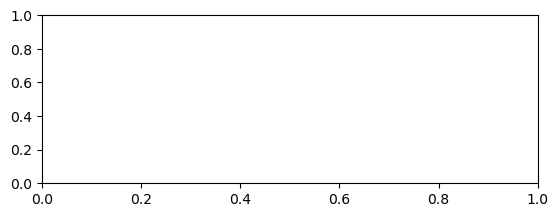

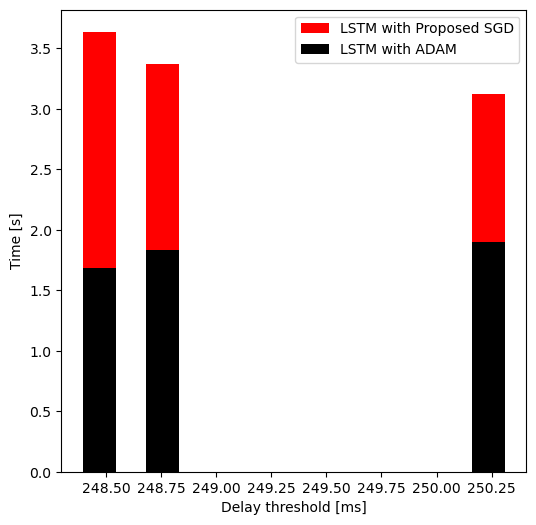

In [251]:
"""Importing packages"""
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from scipy.special import binom, factorial
from sklearn.cluster import KMeans
from scipy.optimize import minimize
import pandas as pd
import numpy as np
import keras
from keras.layers import LSTM, Dropout, Dense
import tensorflow as tf
#import numpy as np
#import pandas as pd
#import tensorflow as tf
from statsmodels.tsa.stattools import adfuller
import pmdarima as pm
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LassoCV
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from sklearn.model_selection import train_test_split 
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, classification_report






def MLParchitecture():
    """
    This function builds an architecture for an LSTM network, and returns the network model
    """
    mlp = keras.Sequential([layers.LSTM(10, activation = 'sigmoid', input_shape=[
    5,7
    ]), layers.Dense(1)])
    optimizer = NonFusedAdam()
    mlp.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse']) 
   # tf.keras.models.experimental.SharpnessAwareMinimization(
  #   mlp, rho=0.05, num_batch_splits=None, name=None)
    return mlp



def LSTMarchitecture():
    """
    This function builds an architecture for an LSTM network, and returns the network model
    """
    lstm = keras.Sequential([layers.LSTM(10, activation = 'sigmoid', input_shape=[
    5,7]), layers.Dense(1)])
    optimizer = keras.optimizers.Adam(lr=0.01)
    lstm.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])     
   # tf.keras.models.experimental.SharpnessAwareMinimization(lstm, rho=0.05, num_batch_splits=None, name=None)
    #SharpnessAwareMinimization(lstm)
    return lstm






Result_threshold = []
Result_mlp = []
Result_threshold_lstm = []
Result_threshold_mlp= []
Result_lstm = []
Result_mlp = []
Result_mlp_accuracy=[]
Result_lstm_accuracy=[]
lstm_time=[]
mlp_time=[]
time_mlp=[]
time_lstm=[]
data =pd.read_csv('new_dataset_0_9 (1).csv')





    
    



for t in range(0, 3): #set threshold 1-3 1 nanoseconds 
    C=[ 248.4688,   248.7574,   250.2366 ]
   # C=[248.7574,  248.7756, 248.7921]
    def gen_pack_delay_sequence():
        Delay = data[["ENDTOEND"]]
        Delay_value = Delay.T
        length=len(Delay_value)
        for i in range(data.shape[0]):
            
            if  Delay.values[i] < C[t]:
                Delay.loc[i] = 1
            else:    
                Delay.loc[i] = 0
        return  Delay
    
    def generate(X, y, seq_length = 5, step=2):
        X_local = []
        y_local = []
        for start in range(0, len(data) - seq_length, step):
            end = start + seq_length
            X_local.append(X[start:end])
            y_local.append(y[end-1])
        return np.array(X_local), np.array(y_local)
    
    def generate_mlp(X, y, seq_length = 5, step=2):
        X_local = []
        y_local = []
        for start in range(0, len(data) - seq_length, step):
            end = start + seq_length
            X_local.append(X[start:end])
            y_local.append(y[end-1])
        return np.array(X_local), np.array(y_local)
    
    y_delay = gen_pack_delay_sequence()
    X = data
    
    ytrain_lstm = y_delay.values
    Xtrain_lstm = data.values
    Xtrain_lstm.shape, ytrain_lstm.shape
    

    X_seq, y=generate(X.values, y_delay.values, seq_length = 5, step = 2)
    ytrain_lstm = y
    Xtrain_lstm = X_seq
    Xtrain_lstm .shape, ytrain_lstm .shape
    
    train_size = int(len(Xtrain_lstm) * 0.7)
    X_train_lstm, y_train_lstm  = Xtrain_lstm [:train_size], ytrain_lstm[:train_size]
    X_test_lstm, y_test_lstm  = Xtrain_lstm[train_size:], ytrain_lstm[train_size:]
    
   
    ytrain_mlp = y_delay.values
    Xtrain_mlp = data.values
    Xtrain_mlp.shape, ytrain_mlp.shape
    

    X_seq_mlp, y_mlp=generate_mlp(X.values, y_delay.values, seq_length = 5, step = 2)
    ytrain_mlp = y_mlp
    Xtrain_mlp = X_seq_mlp
    Xtrain_mlp .shape, ytrain_mlp .shape
    
    train_size = int(len(Xtrain_mlp) * 0.7)
    X_train_mlp , y_train_mlp  = Xtrain_mlp [:train_size], ytrain_mlp[:train_size]
    X_test_mlp, y_test_mlp  = Xtrain_mlp[train_size:], ytrain_mlp[train_size:]
    


 # X_train, X_test, y_train, y_test = train_test_split(Xtrain, ytrain, test_size = 0.20)  
# Feature scaling
 #   scaler = StandardScaler()  
 #   scaler.fit(X_train)
 #   X_train = scaler.transform(X_train)  
 #   X_test = scaler.transform(X_test)
    
    
    
    start_time_lstm=time.time()
    lstm=LSTMarchitecture()
    history=lstm.fit(X_train_lstm, y_train_lstm, batch_size=64, epochs=15)
    lstm_time.append(time.time()-start_time_lstm)
    training_loss_lstm=history.history['loss']
    epoch_count_lstm=range(1, len(training_loss_lstm)+1)
    lstm.evaluate(X_test_lstm, y_test_lstm)
    y_test_prob_lstm  = lstm.predict(X_test_lstm)
    y_test_pred_lstm = np.where(y_test_prob_lstm  > 0.5, 1, 0)
    confusion_matrix(y_test_lstm , y_test_pred_lstm )
    Test_accuracy_lstm  = sum((y_test_pred_lstm )==y_test_lstm )/len(y_test_lstm )
    
   # confusion_matrix(y_test,y_test_pred)
    #Test_accuracy = sum(y_test_pred==y_test)/len(y_test)
    Result_lstm.append(training_loss_lstm)
    Result_lstm_accuracy.append(Test_accuracy_lstm)
    Result_threshold_lstm.append(epoch_count_lstm)
    time_lstm.append(C[t])
    print(classification_report(y_test_lstm , y_test_pred_lstm ))
    
    
    
    
    
    start_time_mlp=time.time()
    mlp=MLParchitecture()
    history=mlp.fit(X_train_lstm, y_train_lstm, batch_size=64, epochs=15)
    mlp_time.append(time.time()-start_time_mlp)
    training_loss_mlp=history.history['loss']
    epoch_count_mlp=range(1, len(training_loss_mlp)+1)
    
    mlp.evaluate(X_test_mlp, y_test_mlp)
    y_test_prob = mlp.predict(X_test_mlp)
    y_test_pred= np.where(y_test_prob > 0.5, 1, 0)
    confusion_matrix(y_test_mlp, y_test_pred)
    Test_accuracy_mlp = sum((y_test_pred)==y_test_mlp)/len(y_test_mlp)
    
   # confusion_matrix(y_test,y_test_pred)
    #Test_accuracy = sum(y_test_pred==y_test)/len(y_test)
    Result_mlp.append(training_loss_mlp)
    Result_mlp_accuracy.append(Test_accuracy_mlp)
    Result_threshold_mlp.append(epoch_count_mlp)
    time_mlp.append(C[t])
    #nd(epoch_count_mlp)
    print(classification_report(y_test_mlp, y_test_pred))
    
    
    

results_df_mlp = pd.DataFrame()
results_df_mlp['MLP']=   mlp_time,
results_df_mlp.to_csv('Result_mlp_9_twostep.csv')

###########
results_df_lstm = pd.DataFrame()
results_df_lstm ['LSTM'] =  lstm_time
results_df_lstm.to_csv('Result_lstm_9_twostep.csv')    

#plt.subplot(2,1,1)
#plt.plot(tf.transpose(Result_threshold_mlp),tf.transpose( Result_mlp),'r-o')
#plt.xlabel('Epochs')
#plt.ylabel('Training loss')
#plt.show();
#plt.plot(tf.transpose(Result_threshold_lstm), tf.transpose(Result_lstm), 'k-o')
#plt.xlabel('Epochs')
#plt.ylabel('Training loss')
#plt.show();



plt.subplot(2,1,1)
fig = plt.figure(figsize=(6, 6))
plt.bar(time_mlp, mlp_time, align='center',  color='red', width = 0.15)
plt.xlabel('Delay threshold [ms]')
plt.ylabel('Time [s]')
plt.bar(time_lstm, lstm_time, align='center',  color='black', width = 0.15)
plt.legend(['LSTM with Proposed SGD','LSTM with ADAM' ])
plt.xlabel('Delay threshold [ms]')
plt.ylabel('Time [s]')
#plt.show();




#plt.subplot(2,1,1)
#plt.plot(time_mlp, Result_mlp_accuracy,'r-o')
#plt.xlabel('Delay threshold [m]')
#plt.ylabel('Training time [s]')
#plt.plot(time_lstm, Result_lstm_accuracy, 'k-o')
#plt.legend(['LSTM with Proposed SGD','LSTM with ADAM' ])
#plt.xlabel('Delay threshold [ms]')
#plt.ylabel('Accuracy')
#plt.show();

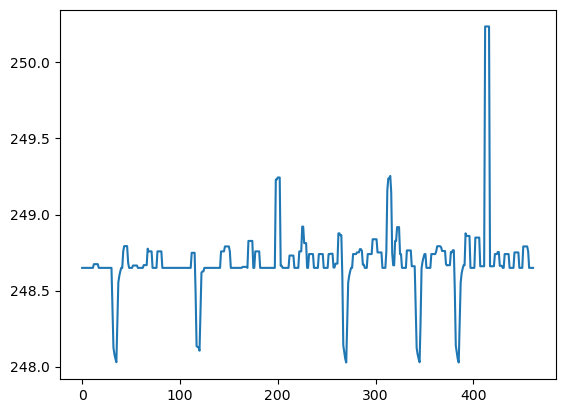

In [206]:
for t in range(0, 15): #set threshold 1-3 1 nanoseconds 
    C=[248.0269, 248.2478,  248.4688, 248.6263, 248.649,  248.6735,  248.6898, 248.7482,  248.7574,  248.7756, 248.7921, 248.9108, 249.1318, 249.3527, 249.5737, 249.7947, 250.0157, 250.2366 ]
   # C=[248.7574,  248.7756, 248.7921]
    def gen_pack_delay_sequence():
        Delay = data[["ENDTOEND"]]
        Delay_value = Delay.T
        length=len(Delay_value)
        for i in range(data.shape[0]):
            
            if  Delay.values[i] < C[t]:
                Delay.loc[i] = 1
            else:    
                Delay.loc[i] = 0
        return  Delay
    
    
     

# 